In [1]:
# find orientation of a shape in kimia-99 shape dataset using cv2 pca

SyntaxError: invalid syntax (859291121.py, line 1)

In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the template image of the shape (replace 'template.png' with the path to your template image)
def get_vector(path):
    image = cv2.imread(path)

    # Convert the template image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the template image to create a binary image
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Find contours in the binary template image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming there is only one contour in the template image (change code accordingly if multiple)
    contour = contours[0]

    # Calculate moments of the template contour
    M = cv2.moments(contour)

    # Calculate the eigenvalues and eigenvectors using PCA for the template image
    covariance_matrix = np.cov(contour.reshape(-1, 2).astype(np.uint8), rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Get the minor eigenvector for the template image
    minor_eigenvector = eigenvectors[1]

    # Draw the minor eigenvector on the image
    cv2.line(image, (int(M['m10']/M['m00']), int(M['m01']/M['m00'])), (int(M['m10']/M['m00'] + 50*minor_eigenvector_template[0]), int(M['m01']/M['m00'] + 50*minor_eigenvector_template[1])), (0, 0, 255), 2)

    # Display the image with the minor eigenvector drawn on it
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    return minor_eigenvector

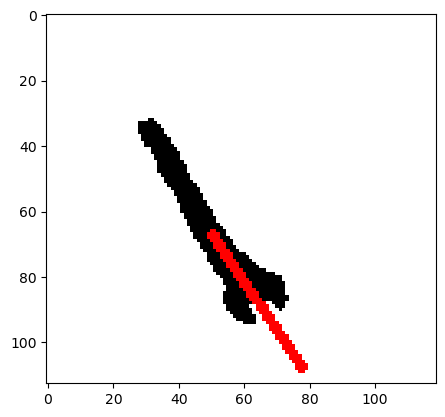

KIMIA dataset/mgen1bp.png


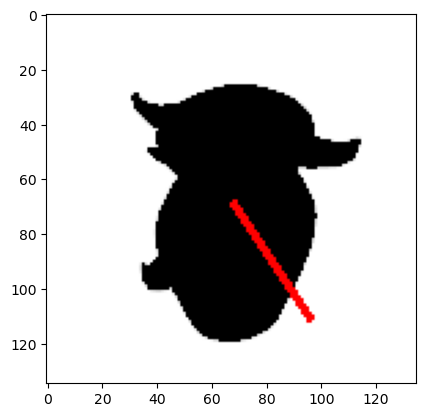

-25.596303945494352
KIMIA dataset/kk0738.png


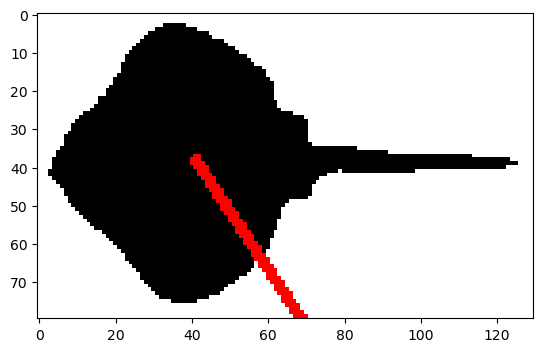

-130.11295916429478
KIMIA dataset/f16occ1.png


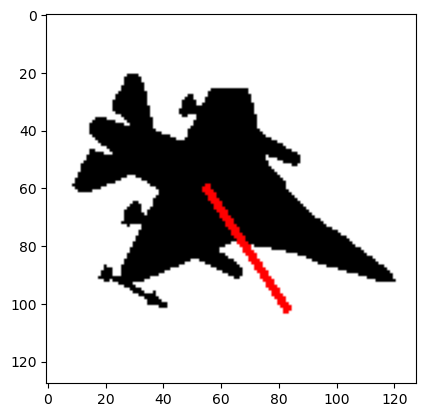

-146.07018717272643
KIMIA dataset/tool12.png


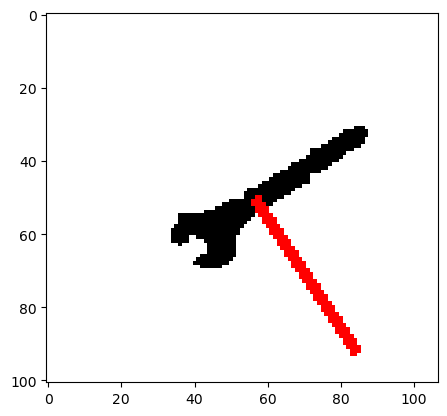

-89.98991716502884
KIMIA dataset/fish30.png


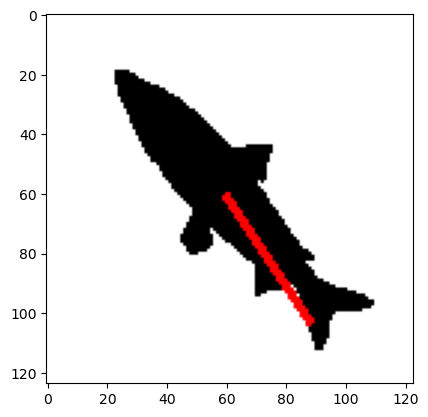

9.478664485140966
KIMIA dataset/kk0736.png


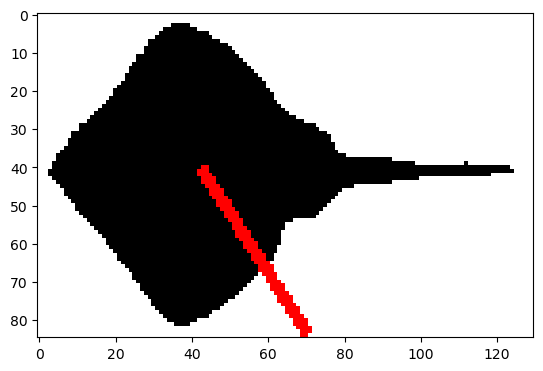

-127.7757904962457
KIMIA dataset/kk0729.png


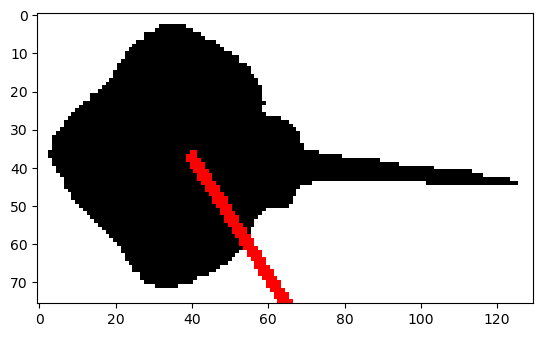

-128.79252488750825
KIMIA dataset/calf1.png


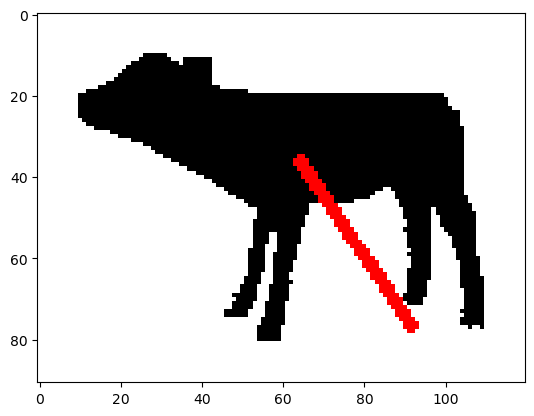

-147.74003564523758
KIMIA dataset/fish14.png


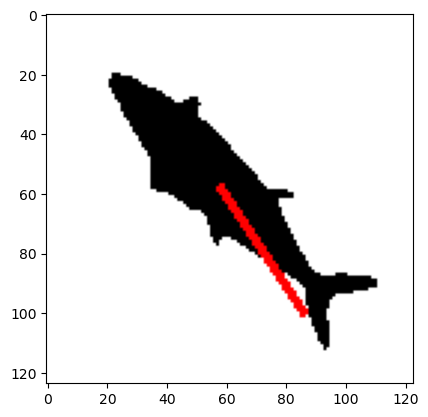

10.654632996506932
KIMIA dataset/tool17.png


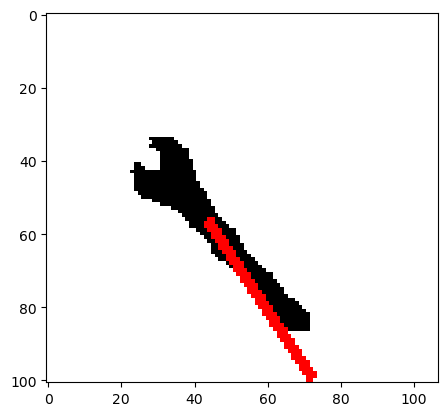

7.777139360723309
KIMIA dataset/kk0728.png


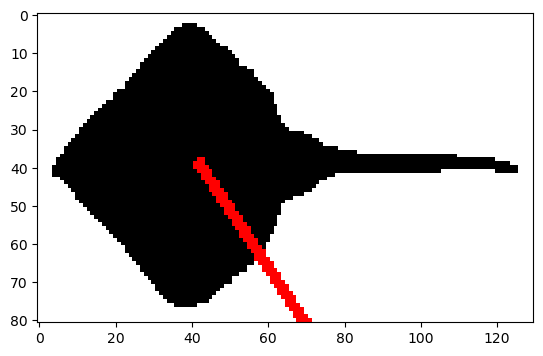

-125.77054726430532
KIMIA dataset/desertcottontail.png


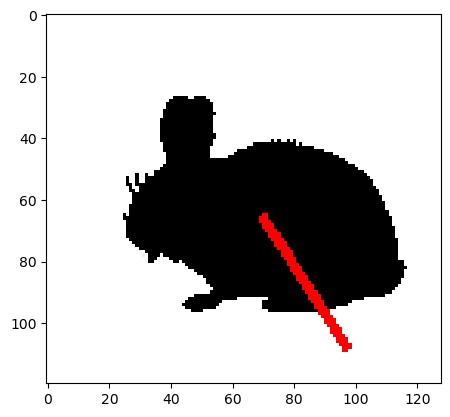

-138.04875716642763
KIMIA dataset/mgen2fp.png


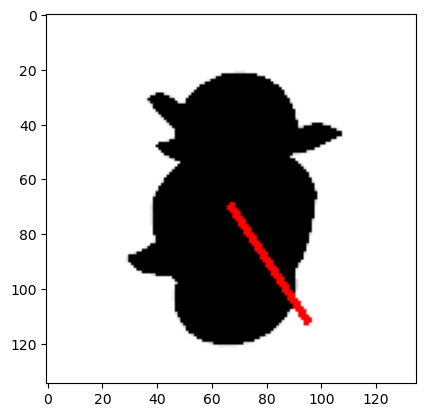

-49.75422086792574
KIMIA dataset/dude5.png


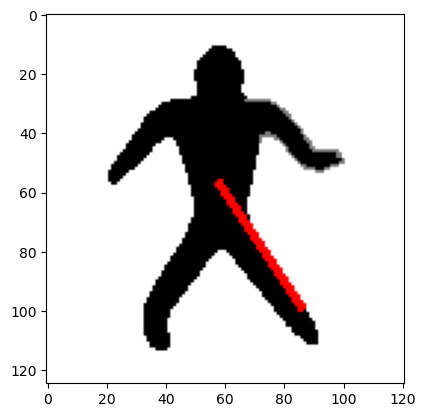

-31.985878809154435
KIMIA dataset/dude0.png


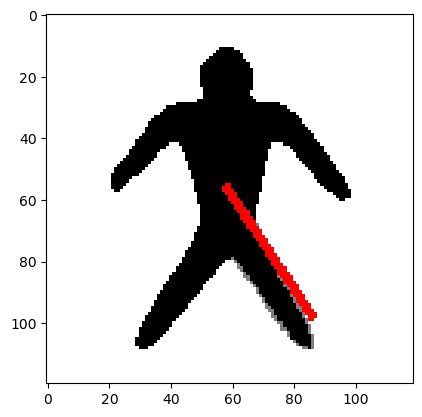

-33.55691343496777
KIMIA dataset/bunny04.png


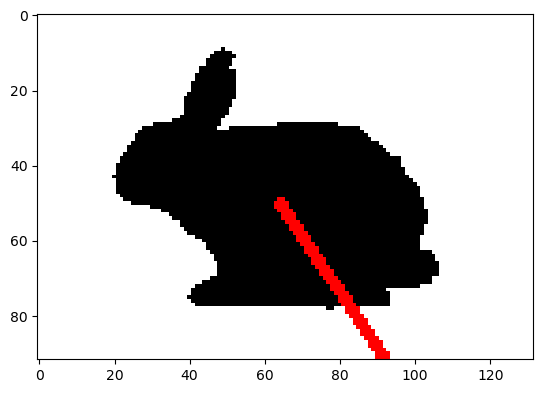

-148.5840744848964
KIMIA dataset/output_minor


error: OpenCV(4.6.0) /croot/opencv-suite_1691620365762/work/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [13]:
temp_path = "KIMIA dataset/tool22.png"
dir_path = "KIMIA dataset/"
dir = os.listdir(dir_path)

temp_vec = get_vector(temp_path)

for i in range(len(dir)):
    if dir[i] != 'output_minor' or dir[i] != "output":
        dir[i] = os.path.join(dir_path, dir[i])

for di in dir:
    if di != 'output_minor' or di != "output":
        print(di)
        img_vec = get_vector(di)
        cos_theta = np.dot(img_vec, temp_vec) / (np.linalg.norm(img_vec) * np.linalg.norm(temp_vec))
        rotation_angle_deg = np.arccos(cos_theta) * 180 / np.pi
        rotation_angle_deg *= np.sign(np.cross(img_vec, temp_vec))
        print(rotation_angle_deg)
        

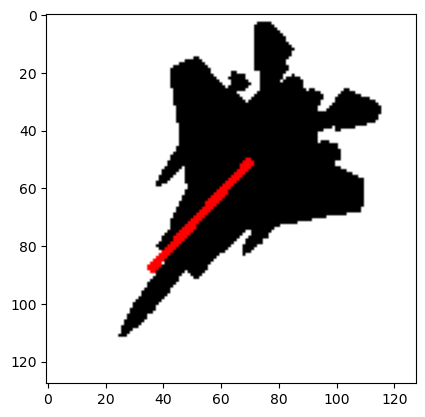

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the template image of the shape (replace 'template.png' with the path to your template image)
template_image = cv2.imread('KIMIA dataset/f15.png')

# Convert the template image to grayscale
template_gray = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)

# Threshold the template image to create a binary image
_, template_thresh = cv2.threshold(template_gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find contours in the binary template image
template_contours, _ = cv2.findContours(template_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming there is only one contour in the template image (change code accordingly if multiple)
template_contour = template_contours[0]

# Calculate moments of the template contour
template_M = cv2.moments(template_contour)

# Calculate the eigenvalues and eigenvectors using PCA for the template image
template_covariance_matrix = np.cov(template_contour.reshape(-1, 2).astype(np.uint8), rowvar=False)
template_eigenvalues, template_eigenvectors = np.linalg.eigh(template_covariance_matrix)

# Get the minor eigenvector for the template image
minor_eigenvector_template = template_eigenvectors[1]
# Draw the minor eigenvector on the template image
# cv2.line(template_image, (int(template_M['m10']/template_M['m00']), int(template_M['m01']/template_M['m00'])), (int(template_M['m10']/template_M['m00'] + 50*minor_eigenvector_template[0]), int(template_M['m01']/template_M['m00'] + 50*minor_eigenvector_template[1])), (0, 0, 255), 2)

# # Display the template image with the minor eigenvector drawn on it
# plt.imshow(cv2.cvtColor(template_image, cv2.COLOR_BGR2RGB))
# plt.show()














# # Set the input and output directories
# input_dir = 'KIMIA dataset/'
# output_dir = 'KIMIA dataset/output_minor/'

# # Create the output directory if it doesn't exist
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# # Loop over all the images in the input directory
# for filename in os.listdir(input_dir):
#     if filename == 'output_minor' or filename =='output':
#         continue
#     # Load the image of the shape
#     image = cv2.imread(os.path.join(input_dir, filename))

#     # Convert the image to grayscale
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Threshold the image to create a binary image
#     _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#     # Find contours in the binary image
#     contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Assuming there is only one contour (change code accordingly if multiple)
#     contour = contours[0]

#     # Calculate moments of the contour
#     M = cv2.moments(contour)

#     # Calculate the eigenvalues and eigenvectors using PCA
#     covariance_matrix = np.cov(contour.reshape(-1, 2).astype(np.uint8), rowvar=False)
#     eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

#     # Get the minor eigenvector for the image
#     minor_eigenvector = eigenvectors[1]

#     # Calculate the angle of the minor eigenvector
#     minor_angle = np.arctan2(minor_eigenvector[1], minor_eigenvector[0]) * 180 / np.pi

#     # Calculate the rotation angle needed to align the image with the template image
#     cos_theta = np.dot(minor_eigenvector, minor_eigenvector_template) / (np.linalg.norm(minor_eigenvector) * np.linalg.norm(template_eigenvectors[1]))
#     rotation_angle_deg = np.arccos(cos_theta) * 180 / np.pi
#     rotation_angle_deg = np.sign(np.cross(minor_eigenvector, template_eigenvectors[1]))

#     # Rotate the image to align with the template image
#     rows, cols = image.shape[:2]
#     M = cv2.getRotationMatrix2D((cols/2, rows/2), -rotation_angle_deg, 1)
#     rotated_image = cv2.warpAffine(image, M, (150, 150))

#     # Show the rotated image with the minor eigenvector drawn on it
#     plt.imshow(rotated_image)
#     plt.plot([contour[0][0][0], contour[0][0][0] + minor_eigenvector[0]*50], [contour[0][0][1], contour[0][0][1] + minor_eigenvector[1]*50], 'r-', linewidth=2)
#     plt.show()

# print("Done!")

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the template image of the shape (replace 'template.png' with the path to your template image)
template_image = cv2.imread('KIMIA dataset/tool22.png')

# Convert the template image to grayscale
template_gray = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)

# Threshold the template image to create a binary image
_, template_thresh = cv2.threshold(template_gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find contours in the binary template image
template_contours, _ = cv2.findContours(template_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming there is only one contour in the template image (change code accordingly if multiple)
template_contour = template_contours[0]

# Calculate moments of the template contour
template_M = cv2.moments(template_contour)

# Calculate the eigenvalues and eigenvectors using PCA for the template image
template_covariance_matrix = np.cov(template_contour.reshape(-1, 2).astype(np.uint8), rowvar=False)
template_eigenvalues, template_eigenvectors = np.linalg.eigh(template_covariance_matrix)

# Get the orientation angles from the eigenvectors for the template image
template_major_angle_rad = np.arctan2(template_eigenvectors[0, 1], template_eigenvectors[0, 0])
template_major_angle_deg = np.degrees(template_major_angle_rad)
template_minor_angle_rad = np.arctan2(template_eigenvectors[1, 1], template_eigenvectors[1, 0])
template_minor_angle_deg = np.degrees(template_minor_angle_rad)

# Set the input and output directories
input_dir = 'KIMIA dataset/'
output_dir = 'KIMIA dataset/output_minor/'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedir(output_dir)

# Loop over all the images in the input directory
for filename in os.listdir(input_dir):
    if filename == 'output_minor' or filename =='output':
        continue
    # Load the image of the shape
    image = cv2.imread(os.path.join(input_dir, filename))
    # print(image)
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to create a binary image
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming there is only one contour (change code accordingly if multiple)
    contour = contours[0]

    # Calculate moments of the contour
    M = cv2.moments(contour)

    # Calculate the eigenvalues and eigenvectors using PCA
    covariance_matrix = np.cov(contour.reshape(-1, 2).astype(np.uint8), rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Get the orientation angles from the eigenvectors
    major_angle_rad = np.arctan2(eigenvectors[0, 1], eigenvectors[0, 0])
    major_angle_deg = np.degrees(major_angle_rad)
    minor_angle_rad = np.arctan2(eigenvectors[1, 1], eigenvectors[1, 0])
    minor_angle_deg = np.degrees(minor_angle_rad)

    # Get the minor eigenvector for the image
    minor_eigenvector = eigenvectors[1]

    # Calculate the angle of the minor eigenvector
    minor_angle = np.arctan2(minor_eigenvector[1], minor_eigenvector[0]) * 180 / np.pi

    # Calculate the rotation angle needed to align the image with the template image
    cos_theta = np.dot(minor_eigenvector, template_eigenvectors[1]) / (np.linalg.norm(minor_eigenvector) * np.linalg.norm(template_eigenvectors[1]))
    rotation_angle_deg = np.arccos(cos_theta) * 180 / np.pi
    rotation_angle_deg = np.sign(np.cross(minor_eigenvector, template_eigenvectors[1]))

    # Rotate the image to align with the template image
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), rotation_angle_deg, 1)
    rotated_image = cv2.warpAffine(image, M, (150, 150))

    # Save the rotated image in the output directory
    output_filename = os.path.join(output_dir, filename)
    cv2.imwrite(output_filename, rotated_image)

print("Done!")

In [ ]:
import cv2
import numpy as np

# Load the image of the shape (replace 'tool22.png' with the path to your image)
image = cv2.imread('tool22.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming there is only one contour (change code accordingly if multiple)
contour = contours[0]

# Calculate moments of the contour
M = cv2.moments(contour)

# Calculate the eigenvalues and eigenvectors using PCA
covariance_matrix = np.cov(contour.reshape(-1, 2).astype(np.uint8), rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Get the orientation angle from the eigenvectors
angle_rad = np.arctan2(eigenvectors[0, 1], eigenvectors[0, 0])
angle_deg = np.degrees(angle_rad)

# Display the orientation angle
print("Orientation Angle (degrees):", angle_deg)

# Draw a line representing the orientation on the image
center_x, center_y = int(M['m10'] / M['m00']), int(M['m01'] / M['m00'])
line_length = 50
line_end_x = int(center_x + line_length * np.cos(angle_rad))
line_end_y = int(center_y + line_length * np.sin(angle_rad))
cv2.line(image, (center_x, center_y), (line_end_x, line_end_y), (0, 0, 255), 2)

# Display the image with the orientation line
cv2.imshow('Shape with Orientation', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image of the shape (replace 'tool22.png' with the path to your image)
image = cv2.imread('KIMIA dataset/f15.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming there is only one contour (change code accordingly if multiple)
contour = contours[0]

# Calculate moments of the contour
M = cv2.moments(contour)

# Calculate the eigenvalues and eigenvectors using PCA
covariance_matrix = np.cov(contour.reshape(-1, 2).astype(np.uint8), rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Get the orientation angles from the eigenvectors
major_angle_rad = np.arctan2(eigenvectors[0, 1], eigenvectors[0, 0])
major_angle_deg = np.degrees(major_angle_rad)
minor_angle_rad = np.arctan2(eigenvectors[1, 1], eigenvectors[1, 0])
minor_angle_deg = np.degrees(minor_angle_rad)

# Display the orientation angles
print("Major Orientation Angle (degrees):", major_angle_deg)
print("Minor Orientation Angle (degrees):", minor_angle_deg)

# Draw a line representing the major eigenvector on the image
center_x, center_y = int(M['m10'] / M['m00']), int(M['m01'] / M['m00'])
line_length = 50
# major_line_end_x = int(center_x + line_length * np.cos(major_angle_rad))
# major_line_end_y = int(center_y + line_length * np.sin(major_angle_rad))
# major_vector = np.array([major_line_end_x - center_x, major_line_end_y - center_y])
# cv2.arrowedLine(image, (center_x, center_y), (major_line_end_x, major_line_end_y), (0, 0, 255), 2)

# Draw a line representing the minor eigenvector on the image
minor_line_end_x = int(center_x + line_length * np.cos(minor_angle_rad))
minor_line_end_y = int(center_y + line_length * np.sin(minor_angle_rad))
minor_vector = np.array([minor_line_end_x - center_x, minor_line_end_y - center_y])
cv2.arrowedLine(image, (center_x, center_y), (minor_line_end_x, minor_line_end_y), (0, 255, 0), 2)

# Convert the image to RGB format for Matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with the orientation lines
plt.imshow(image)
plt.show()

# Print the vectors for the major and minor orientation lines
# print("Major Vector:", major_vector)
print("Minor Vector:", minor_vector)

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set the input and output directories
input_dir = 'KIMIA dataset'
output_dir = 'KIMIA dataset/output'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop over all the images in the input directory
for filename in os.listdir(input_dir):
    # Load the image of the shape
    image = cv2.imread(os.path.join(input_dir, filename))

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to create a binary image
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming there is only one contour (change code accordingly if multiple)
    contour = contours[0]

    # Calculate moments of the contour
    M = cv2.moments(contour)

    # Calculate the eigenvalues and eigenvectors using PCA
    covariance_matrix = np.cov(contour.reshape(-1, 2).astype(np.uint8), rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Get the orientation angles from the eigenvectors
    major_angle_rad = np.arctan2(eigenvectors[0, 1], eigenvectors[0, 0])
    major_angle_deg = np.degrees(major_angle_rad)
    minor_angle_rad = np.arctan2(eigenvectors[1, 1], eigenvectors[1, 0])
    minor_angle_deg = np.degrees(minor_angle_rad)

    # Display the orientation angles
    print("Image:", filename)
    print("Major Orientation Angle (degrees):", major_angle_deg)
    print("Minor Orientation Angle (degrees):", minor_angle_deg)

    # Draw a line representing the major eigenvector on the image
    center_x, center_y = int(M['m10'] / M['m00']), int(M['m01'] / M['m00'])
    line_length = 50
    major_line_end_x = int(center_x + line_length * np.cos(major_angle_rad))
    major_line_end_y = int(center_y + line_length * np.sin(major_angle_rad))
    major_vector = np.array([major_line_end_x - center_x, major_line_end_y - center_y])
    cv2.arrowedLine(image, (center_x, center_y), (major_line_end_x, major_line_end_y), (0, 0, 255), 2)

    # Draw a line representing the minor eigenvector on the image
    minor_line_end_x = int(center_x + line_length * np.cos(minor_angle_rad))
    minor_line_end_y = int(center_y + line_length * np.sin(minor_angle_rad))
    minor_vector = np.array([minor_line_end_x - center_x, minor_line_end_y - center_y])
    cv2.arrowedLine(image, (center_x, center_y), (minor_line_end_x, minor_line_end_y), (0, 255, 0), 2)

    # Save the output image in the output directory
    output_filename = os.path.join(output_dir, filename)
    cv2.imwrite(output_filename, image)

    # Print the vectors for the major and minor orientation lines
    print("Major Vector:", major_vector)
    print("Minor Vector:", minor_vector)
    print()

print("Done!")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = plt.imread('./KIMIA dataset/tool22.png')

image = np.repeat(image[:, :, np.newaxis], 3, axis=2)   # Convert to 3-channel image

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.convertScaleAbs(gray)

# Convert the image to binary
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through detected contours
for contour in contours:
    # Check if the contour has at least 5 points
    if len(contour) < 5:
        continue
    
    # Fit an ellipse to the contour
    ellipse = cv2.fitEllipse(contour)
    
    # Draw the orientation line on the original image
    cv2.ellipse(image, ellipse, (0, 0, 255), 1)
    
    # Get the orientation angle of the ellipse
    angle = ellipse[2]
    
    # Calculate the endpoints of the orientation lines
    center = tuple(map(int, ellipse[0]))
    endpoint3 = (int(center[0] + 0.5 * ellipse[1][1] * np.cos(np.deg2rad(angle + 90))),
                 int(center[1] + 0.5 * ellipse[1][1] * np.sin(np.deg2rad(angle + 90))))
    endpoint4 = (int(center[0] - 0.5 * ellipse[1][1] * np.cos(np.deg2rad(angle + 90))),
                 int(center[1] - 0.5 * ellipse[1][1] * np.sin(np.deg2rad(angle + 90))))
    
    # Draw the orientation lines on the original image
    cv2.line(image, endpoint3, endpoint4, (0, 255, 0), 1)
    
    # Calculate the angle between the orientation line and the x-axis
    dx = endpoint4[0] - endpoint3[0]
    dy = endpoint4[1] - endpoint3[1]
    angle_degrees = np.rad2deg(np.arctan2(dy, dx))
    
    # Print the direction of the orientation line
    print(f"The direction of the orientation line is {angle_degrees:.2f} degrees.")
    
    # Calculate the vector for the orientation line
    vector = np.array([dx, dy])
    
    # Print the vector for the orientation line
    print(f"The vector for the orientation line is {vector}.")

# Display the image with orientations
plt.imshow(image)
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

class GMMClustering:
    def __init__(self, n_components):
        self.n_components = n_components
        self.gmm = None
        
    
    def fit(self, data):
        self.gmm = GaussianMixture(n_components=self.n_components)
        self.gmm.fit(data)
    
    def get_parameters(self):
        return self.gmm.means_, self.gmm.covariances_
    
    def calculate_likelihoods(self, samples):
        return self.gmm.score_samples(samples)
    
    def get_membership_values(self, samples):
        return self.gmm.predict_proba(samples)

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Find the optimal number of clusters using BIC and AIC
lowest_bic = np.infty
bic = []
lowest_aic = np.infty
aic = []

n_components_range = range(1, 11)  # Try different numbers of components
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X_pca)
    bic.append(gmm.bic(X_pca))
    aic.append(gmm.aic(X_pca))
    if bic[-1] < lowest_bic:
        lowest_bic = bic[-1]
        best_gmm_bic = gmm
    if aic[-1] < lowest_aic:
        lowest_aic = aic[-1]
        best_gmm_aic = gmm

# Fit GMM and K-Means models
n_clusters_gmm = best_gmm_bic.n_components
gmm_model = GMMClustering(n_components=n_clusters_gmm)
gmm_model.fit(X_pca)

n_clusters_kmeans = n_clusters_gmm  # Use the same number of clusters as GMM
kmeans_model = KMeans(n_clusters=n_clusters_kmeans)
kmeans_model.fit(X_pca)

# Compute silhouette scores for GMM and K-Means
silhouette_gmm = silhouette_score(X_pca, gmm_model.get_membership_values(X_pca).argmax(axis=1))
silhouette_kmeans = silhouette_score(X_pca, kmeans_model.labels_)

# Plot scatter plots for GMM and K-Means
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_model.get_membership_values(X_pca).argmax(axis=1), cmap='viridis')
plt.title(f'GMM Clustering (Silhouette Score: {silhouette_gmm:.2f})')
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_model.labels_, cmap='viridis')
plt.title(f'K-Means Clustering (Silhouette Score: {silhouette_kmeans:.2f})')
plt.show()

# plot the log likelihood


In [ ]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X = wine.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# def gaussian_pdf(x, mean, cov):
#     """
#     Compute the probability density function of a multivariate Gaussian distribution.
#     :param x: Data point
#     :param mean: Mean of the distribution
#     :param cov: Covariance matrix of the distribution
#     :return: Probability density
#     """
#     k = len(mean)
#     exponent = -0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(cov)), (x - mean))
#     det = np.linalg.det(cov)
#     return (1.0 / ((2 * np.pi) ** (k / 2) * det ** 0.5)) * np.exp(exponent)

# def initialize_parameters(X, n_components):
#     """
#     Initialize the parameters (mean, covariance, and mixing coefficients) for GMM.
#     :param X: Data
#     :param n_components: Number of Gaussian components
#     :return: Initial mean, covariance, and mixing coefficients
#     """
#     n_samples, n_features = X.shape
#     np.random.seed(0)
#     random_indices = np.random.choice(n_samples, size=n_components, replace=False)
#     means = X[random_indices]
#     covariances = [np.eye(n_features) for _ in range(n_components)]
#     mixing_coefficients = np.ones(n_components) / n_components
#     return means, covariances, mixing_coefficients

# def expectation_step(X, means, covariances, mixing_coefficients):
#     """
#     Perform the expectation step of the EM algorithm.
#     :param X: Data
#     :param means: Current means
#     :param covariances: Current covariances
#     :param mixing_coefficients: Current mixing coefficients
#     :return: Updated responsibilities
#     """
#     n_samples, n_features = X.shape
#     n_components = len(means)
#     responsibilities = np.zeros((n_samples, n_components))

#     for i in range(n_samples):
#         for j in range(n_components):
#             responsibilities[i, j] = mixing_coefficients[j] * gaussian_pdf(X[i], means[j], covariances[j])

#         responsibilities[i] /= np.sum(responsibilities[i])

#     return responsibilities

# def maximization_step(X, responsibilities):
#     """
#     Perform the maximization step of the EM algorithm.
#     :param X: Data
#     :param responsibilities: Current responsibilities
#     :return: Updated means, covariances, and mixing coefficients
#     """
#     n_samples, n_features = X.shape
#     n_components = responsibilities.shape[1]

#     # Update mixing coefficients
#     mixing_coefficients = np.mean(responsibilities, axis=0)

#     # Update means and covariances
#     means = np.zeros((n_components, n_features))
#     covariances = []

#     for j in range(n_components):
#         Nj = np.sum(responsibilities[:, j])
#         means[j] = np.sum(X * responsibilities[:, j][:, np.newaxis], axis=0) / Nj
#         covariances.append(np.dot((X - means[j]).T, (X - means[j]) * responsibilities[:, j][:, np.newaxis]) / Nj)

#     return means, covariances, mixing_coefficients

# def log_likelihood(X, means, covariances, mixing_coefficients):
#     """
#     Compute the log-likelihood of the data under the GMM model.
#     :param X: Data
#     :param means: Current means
#     :param covariances: Current covariances
#     :param mixing_coefficients: Current mixing coefficients
#     :return: Log-likelihood
#     """
#     n_samples, _ = X.shape
#     n_components = len(means)
#     likelihoods = np.zeros((n_samples, n_components))

#     for i in range(n_samples):
#         for j in range(n_components):
#             likelihoods[i, j] = mixing_coefficients[j] * gaussian_pdf(X[i], means[j], covariances[j])

#     log_likelihood = np.sum(np.log(np.sum(likelihoods, axis=1)))

#     return log_likelihood

# def fit_gmm(X, n_components, n_iterations=100, tol=1e-4):
#     """
#     Fit a Gaussian Mixture Model to the data using the EM algorithm.
#     :param X: Data
#     :param n_components: Number of Gaussian components
#     :param n_iterations: Maximum number of iterations
#     :param tol: Tolerance for convergence
#     :return: means, covariances, mixing coefficients, responsibilities
#     """
#     means, covariances, mixing_coefficients = initialize_parameters(X, n_components)
#     prev_log_likelihood = -np.inf

#     for iteration in range(n_iterations):
#         # Expectation step
#         responsibilities = expectation_step(X, means, covariances, mixing_coefficients)

#         # Maximization step
#         means, covariances, mixing_coefficients = maximization_step(X, responsibilities)

#         # Compute the log-likelihood
#         current_log_likelihood = log_likelihood(X, means, covariances, mixing_coefficients)

#         # Check for convergence
#         if np.abs(current_log_likelihood - prev_log_likelihood) < tol:
#             break

#         prev_log_likelihood = current_log_likelihood

#     return means, covariances, mixing_coefficients, responsibilities


In [ ]:
# n_components = 3  # Specify the number of Gaussian components
# means, covariances, mixing_coefficients, responsibilities = fit_gmm(X_scaled, n_components)
# cluster_assignments = np.argmax(responsibilities, axis=1)


In [ ]:
# import matplotlib.pyplot as plt

# # Plot the data points with cluster assignments
# plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_assignments, cmap='viridis')
# plt.title('GMM Clustering')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

class GMM:
    def __init__(self, n_components, max_iterations=1000, tol=1e-4):
        self.n_components = n_components
        self.max_iterations = max_iterations
        self.tol = tol

    def initialize_parameters(self, X):
        n_samples, n_features = X.shape
        np.random.seed(0)
        random_indices = np.random.choice(n_samples, size=self.n_components, replace=False)
        self.means = X[random_indices]
        self.covariances = [np.eye(n_features) for _ in range(self.n_components)]
        self.mixing_coefficients = np.ones(self.n_components) / self.n_components

    def gaussian_pdf(self, x, mean, cov):
        k = len(mean)
        exponent = -0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(cov)), (x - mean))
        det = np.linalg.det(cov)
        return (1.0 / ((2 * np.pi) ** (k / 2) * det ** 0.5)) * np.exp(exponent)

    def expectation_step(self, X):
        n_samples = X.shape[0]
        self.responsibilities = np.zeros((n_samples, self.n_components))

        for i in range(n_samples):
            for j in range(self.n_components):
                self.responsibilities[i, j] = self.mixing_coefficients[j] * self.gaussian_pdf(X[i], self.means[j], self.covariances[j])

            self.responsibilities[i] /= np.sum(self.responsibilities[i])

    def maximization_step(self, X):
        n_samples = X.shape[0]
        n_features = X.shape[1]

        for j in range(self.n_components):
            Nj = np.sum(self.responsibilities[:, j])
            self.means[j] = np.sum(X * self.responsibilities[:, j][:, np.newaxis], axis=0) / Nj
            self.covariances[j] = np.dot((X - self.means[j]).T, (X - self.means[j]) * self.responsibilities[:, j][:, np.newaxis]) / Nj

        self.mixing_coefficients = np.mean(self.responsibilities, axis=0)

    def fit(self, X):
        self.initialize_parameters(X)
        self.X = X

        for iteration in range(self.max_iterations):
            prev_means = np.copy(self.means)

            self.expectation_step(X)
            self.maximization_step(X)

            # Check for convergence
            if np.all(np.abs(self.means - prev_means) < self.tol):
                break

    def predict(self):
        self.expectation_step(self.X)
        return np.argmax(self.responsibilities, axis=1)
    
    def log_likelihood(self, X):
        n_samples = X.shape[0]
        log_likelihood = 0.0

        for i in range(n_samples):
            likelihood = 0.0
            for j in range(self.n_components):
                likelihood += self.mixing_coefficients[j] * self.gaussian_pdf(X[i], self.means[j], self.covariances[j])
            log_likelihood += np.log(likelihood)

        return log_likelihood

    def aic(self, X):
        log_likelihood = self.log_likelihood(X)
        n_features = X.shape[1]
                     # 3 GAUSSIANS        # FOR MEAN   # FOR COVARIANCE                       # FOR MIXING COEFFICIENTS
        num_params = (self.n_components * (n_features + n_features * (n_features + 1) / 2)) + (self.n_components - 1)
        aic = -2 * log_likelihood + 2 * num_params
        return aic

    def bic(self, X):
        log_likelihood = self.log_likelihood(X)
        n_samples, n_features = X.shape
        
        num_params =  self.n_components * (n_features + n_features * (n_features + 1) / 2) + (self.n_components - 1)
        bic = -2 * log_likelihood + np.log(n_samples) * num_params
        return bic

# Load the wine dataset and standardize it
wine = load_wine()
X = wine.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Try different numbers of components and compute AIC and BIC
n_components_range = range(1, 7)
aic_values = []
bic_values = []
min_aic = np.infty # for minimum aic components
min_bic = np.infty # for minimum bic components
best_gmm_aic = None # for gmm object
best_gmm_bic = None # for gmm object
aic_n_components = 0
bic_n_components = 0

for n_components in n_components_range:
    gmm = GMM(n_components)
    gmm.fit(X_pca)
    aic = gmm.aic(X_pca)
    bic = gmm.bic(X_pca)
    aic_values.append(aic)
    bic_values.append(bic)
    print(aic)
    print(bic)
    if(aic < min_aic):
        min_aic = aic
        best_gmm_aic = gmm
        aic_n_components = n_components
    if(bic < min_bic):
        min_bic = bic
        best_gmm_bic = gmm
        bic_n_components = n_components

# Plot AIC and BIC values as a function of the number of components
plt.plot(n_components_range, aic_values, label='AIC')
plt.plot(n_components_range, bic_values, label='BIC')
plt.legend()
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC for GMM Clustering')
plt.show()

# Predict cluster assignments
best_gmm_aic.fit(X_pca)
cluster_assignments = best_gmm_aic.predict()
print(min_aic)

# Plot the data points with cluster assignments
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_assignments, cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

print(min_bic)
best_gmm_bic.fit(X_pca)
cluster_assignments = best_gmm_bic.predict()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_assignments, cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
# # Load the wine dataset and standardize it
# wine = load_wine()
# X = wine.data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Perform PCA for dimensionality reduction to 2 components
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# # Try different numbers of components and compute AIC and BIC
# n_components_range = range(1, 7)
# aic_values = []
# bic_values = []

# for n_components in n_components_range:
#     gmm = GMM(n_components)
#     gmm.fit(X_pca)
#     aic = gmm.aic(X_pca)
#     bic = gmm.bic(X_pca)
#     aic_values.append(aic)
#     bic_values.append(bic)

# # Plot AIC and BIC values as a function of the number of components
# plt.plot(n_components_range, aic_values, label='AIC')
# plt.plot(n_components_range, bic_values, label='BIC')
# plt.legend()
# plt.xlabel('Number of Components')
# plt.ylabel('Information Criterion')
# plt.title('AIC and BIC for GMM Clustering')
# plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import load_wine
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from scipy.stats import multivariate_normal

# class GMM:
#     def __init__(self, n_components, max_iterations=1000, tol=1e-4):
#         self.n_components = n_components
#         self.max_iterations = max_iterations
#         self.tol = tol

#     def initialize_parameters(self, X):
#         n_samples, n_features = X.shape
#         np.random.seed(0)
#         random_indices = np.random.choice(n_samples, size=self.n_components, replace=False)
#         self.means = X[random_indices]
#         self.covariances = [np.eye(n_features) for _ in range(self.n_components)]
#         self.mixing_coefficients = np.ones(self.n_components) / self.n_components

#     def gaussian_pdf(self, x, mean, cov):
#         k = len(mean)
#         exponent = -0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(cov)), (x - mean))
#         det = np.linalg.det(cov)
#         return (1.0 / ((2 * np.pi) ** (k / 2) * det ** 0.5)) * np.exp(exponent)

#     def expectation_step(self, X):
#         n_samples = X.shape[0]
#         self.responsibilities = np.zeros((n_samples, self.n_components))

#         for i in range(n_samples):
#             for j in range(self.n_components):
#                 self.responsibilities[i, j] = self.mixing_coefficients[j] * self.gaussian_pdf(X[i], self.means[j], self.covariances[j])

#             self.responsibilities[i] /= np.sum(self.responsibilities[i])

#     def maximization_step(self, X):
#         n_samples = X.shape[0]
#         n_features = X.shape[1]

#         for j in range(self.n_components):
#             Nj = np.sum(self.responsibilities[:, j])
#             self.means[j] = np.sum(X * self.responsibilities[:, j][:, np.newaxis], axis=0) / Nj
#             self.covariances[j] = np.dot((X - self.means[j]).T, (X - self.means[j]) * self.responsibilities[:, j][:, np.newaxis]) / Nj

#         self.mixing_coefficients = np.mean(self.responsibilities, axis=0)

#     def fit(self, X):
#         self.initialize_parameters(X)

#         for iteration in range(self.max_iterations):
#             prev_means = np.copy(self.means)

#             self.expectation_step(X)
#             self.maximization_step(X)

#             # Check for convergence
#             if np.all(np.abs(self.means - prev_means) < self.tol):
#                 break

#     def predict(self, X):
#         self.expectation_step(X)
#         return np.argmax(self.responsibilities, axis=1)

#     def calculate_aic_bic(self, X):
#         log_likelihood = self.log_likelihood(X)
#         n_samples, n_features = X.shape

#         # Calculate AIC and BIC
#         aic = -2 * log_likelihood + 2 * (self.n_components * n_features + self.n_components - 1)
#         bic = -2 * log_likelihood + np.log(n_samples) * (self.n_components * n_features + self.n_components - 1)

#         return aic, bic

#     def log_likelihood(self, X):
#         n_samples = X.shape[0]
#         log_likelihood = 0.0

#         for i in range(n_samples):
#             likelihood = 0.0
#             for j in range(self.n_components):
#                 likelihood += self.mixing_coefficients[j] * multivariate_normal.pdf(X[i], self.means[j], self.covariances[j])
#             log_likelihood += np.log(likelihood)

#         return log_likelihood


# # Load the wine dataset and standardize it
# wine = load_wine()
# X = wine.data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Perform PCA for dimensionality reduction to 2 components
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# # Initialize variables to store AIC and BIC values
# n_components_range = range(1, 11)
# aic_values = []
# bic_values = []

# for n_components in n_components_range:
#     gmm = GMM(n_components)
#     gmm.fit(X_pca)
#     aic, bic = gmm.calculate_aic_bic(X_pca)
#     aic_values.append(aic)
#     bic_values.append(bic)

# # Find the optimal number of components based on AIC and BIC
# optimal_components_aic = n_components_range[np.argmin(aic_values)]
# optimal_components_bic = n_components_range[np.argmin(bic_values)]

# print(f'Optimal number of components based on AIC: {optimal_components_aic}')
# print(f'Optimal number of components based on BIC: {optimal_components_bic}')

# # Create and fit the GMM model with the optimal number of components
# n_components = optimal_components_bic  # You can choose AIC or BIC as per your preference
# n_components = 3
# gmm = GMM(n_components)
# gmm.fit(X_pca)

# # Predict cluster assignments
# cluster_assignments = gmm.predict(X_pca)

# # Plot the data points with cluster assignments
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_assignments, cmap='viridis')
# plt.title(f'GMM Clustering (Optimal Components: {n_components})')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

# # plot for aic also
# n_components = optimal_components_aic  # You can choose AIC or BIC as per your preference
# gmm = GMM(n_components)
# gmm.fit(X_pca)

# cluster_assignments = gmm.predict(X_pca)

# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_assignments, cmap='viridis')
# plt.title(f'GMM Clustering (Optimal Components: {n_components})')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

In [ ]:
for i in range(1, 11):
    gmm = GMM(n_components=i)
    gmm.fit(X_pca)
    aic, bic = gmm.calculate_aic_bic(X_pca)
    print(f'Number of components: {i} | AIC: {aic:.2f} | BIC: {bic:.2f}')